week5

다음 사이트에서 insurance.csv 데이터를 다운 받아 주세요.

https://www.kaggle.com/datasets/mirichoi0218/insurance/code 

###1. Medical Cost Perconal Datasets을 이용한 선형 회귀 문제

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1.1 'insurance.csv' 데이터셋을 로드하여 insurance 변수에 저장하고, head()를 통해 데이터를 확인하세요.

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1.2 데이터의 정보를 확인하세요.

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1.3 데이터의 기본 통계량을 확인하세요.

In [4]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1.4  'sex', 'smoker', 'region' 세 카테고리 변수는 인코딩이 필요합니다. 'get_dummies'를 이용하여 원핫 인코딩을 진행하세요.

In [5]:
insurance=pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'])
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


1.5 독립변수(X), 종속변수(y = 'charges')을 분리한 후 'train_test_split'으로 학습 데이터와 테스트 데이터를 분리해주세요. (test_size = 0.3, random_state=0) 

In [6]:
from sklearn.model_selection import train_test_split
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,
                                               random_state=0)

1.6 사이킷런 LinearRegression 클래스를 통해 회귀 모델 학습/예측을 수행해주세요.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression().fit(X_train, y_train)
y_preds=lr.predict(X_test)

1.7 사이킷런 API를 이용해 MAE, MSE, RMSE, R2 평가지표로 평가를 수행하고 출력하세요.


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print('MAE : {0:.3f} / MSE : {1:.3f} / RMSE : {2:.3f} / R2 : {3:.3f}'.format(mae,mse,rmse,r2))

MAE : 4011.450 / MSE : 33342497.827 / RMSE : 5774.296 / R2 : 0.791


1.8 LinearRegression의 속성을 이용해 절편과 회귀계수를 출력해주세요.

In [11]:
print('절편 값: ', lr.intercept_)
print('회귀 계수 값: ', lr.coef_)

절편 값:  -730.1121662702517
회귀 계수 값:  [   256.43544682    335.36907276    472.70978916     23.77337759
    -23.77337759 -11717.99558474  11717.99558474    589.02469054
     27.12354518   -405.723989     -210.42424672]


1.9 coef_ 속성은 회귀계수만을 보여주기 때문에, 어떤 칼럼에 대한 회귀 계수인지 알 수 없습니다. 피처별 회귀계수 값을 매핑하여 높은 순으로 출력하세요.

In [12]:
coef = pd.Series(data=np.round(lr.coef_, 1), index=X.columns)
coef.sort_values(ascending=False)

smoker_yes          11718.0
region_northeast      589.0
children              472.7
bmi                   335.4
age                   256.4
region_northwest       27.1
sex_female             23.8
sex_male              -23.8
region_southwest     -210.4
region_southeast     -405.7
smoker_no          -11718.0
dtype: float64

1.10 이번에는 교차검증을 통해 MAE, MSE를 계산해보겠습니다. 'neg'에 주의하여 'cross_val_score'을 실시하고 [개별 negative MAE scores] [개별 MSE scores] 그리고 [평균 RMSE]를 출력해주세요. (cv=3)

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
lr = LinearRegression()
neg_mae_scores = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=3)
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=3)
mse_scores = -1*neg_mse_scores
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('3 folds의 개별 negative MAE scores : ',np.round(neg_mae_scores,2))
print('3 folds의 개별 MSE scores : ',np.round(mse_scores,2))
print('3 folds의 평균 RMSE : ',np.round(avg_rmse,3))

3 folds의 개별 negative MAE scores :  [-4266.93 -4097.77 -4341.61]
3 folds의 개별 MSE scores :  [37388213.08 34952866.56 40020943.28]
3 folds의 평균 RMSE :  6117.632


1.11 'age', 'bmi', 'children'에 대한 'charges'의 OLS summary를 출력하세요.

In [15]:
import statsmodels.formula.api as smf

results=smf.ols('charges~ age + bmi + children', data=insurance).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           8.80e-37
Time:                        17:13:19   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.0

### 2. 경사하강법

[make_regression()](https://datascienceschool.net/03%20machine%20learning/04.01%20%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%20%EC%98%88%EC%A0%9C.html)은 가상의 회귀분석 문제를 제공해주는 명렁어입니다. 이 명령어를 이용해 경사하강법 실습을 해보겠습니다.

먼저 다음의 코드를 실행해 X, y, w를 생성해주세요.



In [16]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

2.1 y는 1차원 배열입니다. 'reshape' 명령어를 통해 y를 2차원 배열로 변환하고, X, y의 shape을 출력해주세요.

In [17]:
y = y.reshape(50,1)
print(X.shape)
print(y.shape)

(50, 1)
(50, 1)


2.2 X, y의 산점도를 출력해주세요.

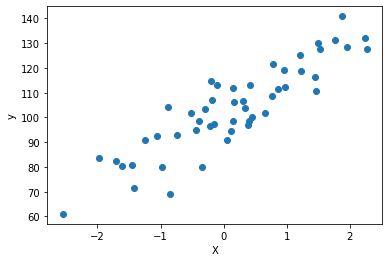

In [18]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

2.3 경사하강법을 위한 get_weight_updates, gradient_descent_stpes, get_cost 함수를 완성해주세요. 빈 괄호를 채워주세요.

In [19]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = (np.dot(X,w1.T)) + w0
    diff = y-y_pred

    w0_factors = np.ones((N,1))

    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [20]:
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = (w1-w1_update)
        w0 = (w0-w0_update)
              
    return w1, w0

In [21]:
def get_cost(y,y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

2.4 gradient_descent_steps 함수를 이용해 w1, w0을 계산하여 출력하세요. 또 get_cost 함수를 이용해 실제값과 예측값의 RSS 차이를 출력하세요.

In [22]:
# 예측값과 실제값의 RSS 차이를 계산하는 함수 생성
w1, w0 = gradient_descent_steps(X,y,iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X +w0
print('경사 하강 total cost: {0:.4f}'.format(get_cost(y,y_pred)))

w1:13.920 w0:101.714
경사 하강 total cost: 64.1102


2.5 X,y의 산점도와 함께 앞에서 구한 y_pred 기반 회귀선을 그려주세요.

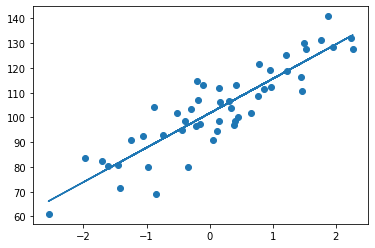

In [23]:
plt.scatter(X,y)
plt.plot(X, y_pred)

### 3. 규제 선형 모델

#### 
alpha 값의 변화에 따른 릿지 회귀를 수행해보겠습니다.
릿지의 alpha 값을 0, 0.1, 1, 10, 100으로 변화시키면서 cv=5인 교차검증을 수행하고, 그에 따른 RMSE의 평균값을 출력해주세요.

alphas = [0, 0.1, 1, 10, 100]

In [24]:
from sklearn.linear_model import Ridge

In [25]:
alphas=[0,0.1,1,10,100]

for alpha in alphas:
    ridge=Ridge(alpha=alpha)
    
    neg_mse_scores=cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    
    print('alpha {0} 일 때 5폴드의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5폴드의 평균 RMSE : 8.369
alpha 0.1 일 때 5폴드의 평균 RMSE : 8.366
alpha 1 일 때 5폴드의 평균 RMSE : 8.342
alpha 10 일 때 5폴드의 평균 RMSE : 8.462
alpha 100 일 때 5폴드의 평균 RMSE : 12.692


#### 
릿지 회귀에서 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame으로 출력해주세요.

In [31]:
ridge_alphas=[0,0.1,1,10,100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

KeyError: 'alpha:0'

#### 
alpha 값의 변화에 따른 라쏘 회귀를 수행해보겠습니다.
릿지의 alpha 값을 0.07, 0.1, 0.5, 1, 3으로 변화시키면서 cv=5인 교차검증을 수행하고, 그에 따른 RMSE의 평균값을 출력해주세요.

alphas = [0.07, 0.1, 0.5, 1, 3]

In [33]:
from sklearn.linear_model import Lasso

In [34]:
alphas=[0.07, 0.1, 0.5, 1, 3]

for alpha in alphas:
    lasso=Lasso(alpha=alpha)
    
    neg_mse_scores=cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    
    print('alpha {0} 일 때 5폴드의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0.07 일 때 5폴드의 평균 RMSE : 8.364
alpha 0.1 일 때 5폴드의 평균 RMSE : 8.362
alpha 0.5 일 때 5폴드의 평균 RMSE : 8.345
alpha 1 일 때 5폴드의 평균 RMSE : 8.343
alpha 3 일 때 5폴드의 평균 RMSE : 8.542


#### 
라쏘 회귀에서 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame으로 출력해주세요.

In [35]:
lasso_alphas=[0.07, 0.1, 0.5, 1, 3]
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

KeyError: 'alpha:0.07'

#### 
alpha 값의 변화에 따른 엘라스틱넷 회귀를 수행해보겠습니다. l1_ratio는 0.5로 고정하겠습니다.
엘라스틱넷의 alpha 값을 0.07, 0.1, 0.5, 1, 3으로 변화시키면서 cv=5인 교차검증을 수행하고, 그에 따른 RMSE의 평균값을 출력해주세요.

alphas = [0.07, 0.1, 0.5, 1, 3]

In [36]:
from sklearn.linear_model import ElasticNet

In [37]:
alphas=[0.07, 0.1, 0.5, 1, 3]

for alpha in alphas:
    elastic=ElasticNet(alpha=alpha, l1_ratio=0.5)
    
    neg_mse_scores=cross_val_score(elastic, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores=np.sqrt(-1*neg_mse_scores)
    avg_rmse=np.mean(rmse_scores)
    
    print('alpha {0} 일 때 5폴드의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0.07 일 때 5폴드의 평균 RMSE : 8.334
alpha 0.1 일 때 5폴드의 평균 RMSE : 8.326
alpha 0.5 일 때 5폴드의 평균 RMSE : 8.501
alpha 1 일 때 5폴드의 평균 RMSE : 9.110
alpha 3 일 때 5폴드의 평균 RMSE : 11.702


#### 
엘라스틱 회귀에서 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame으로 출력해주세요.

In [38]:
elastic_alphas=[0.07, 0.1, 0.5, 1, 3]
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

KeyError: 'alpha:0.07'

### 4.Logistic Regression

Dataset <fish.csv>를 다운 받아주세요!
#### fish의 Weight, Length, Diagnal, Height, Width 정보를 바탕으로 fish의 Species를 분류하는 예제

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

#### 'fish.csv'로 fish_df를 생성하세요

In [80]:
fish_df = pd.read_csv('fish.csv')
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


#### fish 데이터 세트의 target 배열은 Species입니다.
#### fish_df를 y_target, X_data로 분리해주세요

In [81]:
X_data=fish_df.drop("Species",axis=1)
y_target=fish_df["Species"]

#### X_data와 y_target을 X_train, X_test, y_train, y_test으로 나누세요. (test_size=0.3, random_state=42)

In [82]:
X_train, X_test, y_train, y_test=train_test_split(X_data,y_target,test_size=0.3,
                                               random_state=42)

#### StandardScaler를 이용해 데이터 변환을 해주세요

In [83]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(X_data)

X_train, X_test, y_train, y_test=train_test_split(data_scaled,y_target,test_size=0.3,
                                               random_state=42)

#### 로지스틱 회귀를 이용해서 학습 및 예측을 수행하고 정확도와 ROC-AUC값을 구하세요 (solver = liblinear, C=20, max_iter=1000)

In [84]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf=LogisticRegression(solver='liblinear', C=20, max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_preds=lr_clf.predict(X_test)
print(accuracy_score(y_test, lr_preds), roc_auc_score(y_test, lr_preds))

ValueError: could not convert string to float: 'Perch'